# 
MNIST is often considered the hello world of machine learning. It contains 70,000 images of handwritten digits suitable for image classification. Typically, 60,000 of these images are used for training and 10,000 are set aside for testing. Each digit is a black and white 28 x 28 pixel image along with a label, so the full dataset can be used for supervised training as well as testing unsupervised algorithms.

Over the years, MNIST has been used to measure the accuracy of a number of different algorithms. In this example, we will train a standard three layer neural network. Even this simple model can achieve 98% accuracy, rivaling human performance.

This example requires Python 3, Keras, Tensorflow, matplotlib, and numpy. You can use either Tensorflow-CPU or Tensorflow-GPU, of course Tensorflow-GPU will train significantly faster.



In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random
from tensorflow.keras import backend as K

Using TensorFlow backend.


# Load data
Keras has a builting function for loading MNIST data and splitting it into train and test sets. x_train and x_test are arrays of train and test input images respectively. Images are represented as a 28 x 28 matrix of pixel values. y_train and y_test are train and test labels respectively.

Pixel values are normalized into values ranging from 0.0 - 1.0.

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
# Save original test images for display purposes
orig_test = x_test

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


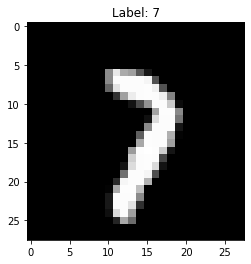

In [5]:
#The following cell display random test images to get an idea of what they look like.
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

In [6]:
#orig_test.shape
#orig_test[1]
y_test.shape

(10000,)

# Model selection::
Many different model exists in machine earning ;
1.Deep learning model outperform other model

2.Several types of deep leaning models

3.Deep learning model have several layer

4.weight and nias are learned  during training

# Best vision model
Convolutional neural network


In [7]:
#These are some configuration parameters and hyperparameters.

# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

#  data preparation::

In [8]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# CNN:: 
Convolution layer
Pool layer
Dense or fully connected layer

# defination of Model::
CNNs are like two dimensional Finite Impulse Response (FIR) filters commonly used in signal processing. Models with over 100 CNN, pooling, padding, and other layers have been successfully trained to recognize complex objects as well as multiple objects in the one image.

This model uses two convolutional layers, a max pooling layer, a dense layer, and a one-hot encoded output layer. Even with these few layers, this model can achieve over 99% accuracy.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

# Train Model
This is more or less boilerplate Keras code to train the model given the training data set. Keras can also evaluate the trained model given the test data set. Matplotlib is used to plot train and test accuracy as a function of the epoch number.

Ideally, the accuracy with test and train data should be about the same. Low training accuracy means the model exhibits high bias. High bias could be caused by a weak model, not enough training examples, or too few training epochs. High train accuracy and low test accuracy is a case of high variance. This means the model is more or less "memorizing" the expected output and not generalizing well. High variance can be reduced through regularization.

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 123s 2ms/step - loss: 0.9096 - accuracy: 0.7054 - val_loss: 0.2983 - val_accuracy: 0.9107
Epoch 2/20
60000/60000 [==============================] - 119s 2ms/step - loss: 0.4337 - accuracy: 0.8678 - val_loss: 0.2374 - val_accuracy: 0.9259
Epoch 3/20
60000/60000 [==============================] - 110s 2ms/step - loss: 0.3888 - accuracy: 0.8820 - val_loss: 0.2075 - val_accuracy: 0.9365
Epoch 4/20
60000/60000 [==============================] - 113s 2ms/step - loss: 0.3593 - accuracy: 0.8904 - val_loss: 0.1885 - val_accuracy: 0.9402
Epoch 5/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.3400 - accuracy: 0.8967 - val_loss: 0.1711 - val_accuracy: 0.9485
Epoch 6/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.3271 - accuracy: 0.8990 - val_loss: 0.1656 - val_accuracy: 0.9520
Epoch 7/20
60000/60000 [==============================] - 109s

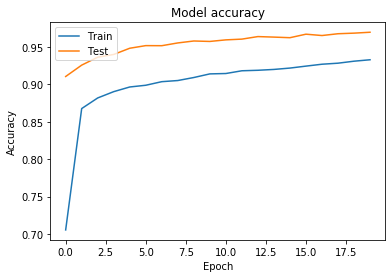

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Make Predictions
Let's make some predictions using the trained model from above. This model could have been read from a file of a previously trained model. To see an example of restoring a trained model, take a look at the MNIST Prediction notebook.

Note that x_test has been reshaped in an earlier cell to suit this model.

In [11]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

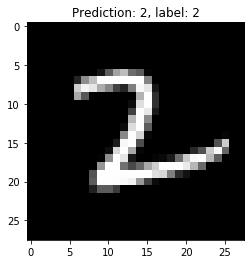

In [12]:
#The following cell chooses a random test image, prints the model predicted value, expected value (label), and the original image.
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

# Error Analysis
The next cell looks for model predictions that specifically do not match the expected value. In some cases, even humans might disagree on what this image is.

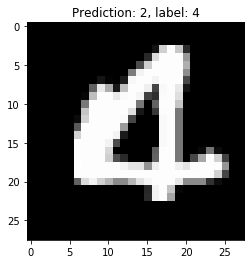

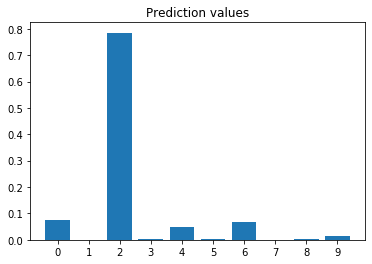

In [13]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

# commom question?
1.how many layer do you need?
Ans.It deepends upon the data and output reqiurement
2.How much training data is required ?
ans. depends on the data , binary classification doen't require much training data.
3.Experiment
ans.test your hypothesis on your own is best.
4.